In [1]:
#import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from sklearn import set_config

#output dataframes instead of arrays
set_config(transform_output = "pandas")

In [5]:
# read in our data

sacramento = pd.read_csv("dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1005 MORENO WAY,SACRAMENTO,95838,CA,3,2,1410,Residential,Fri May 16 00:00:00 EDT 2008,180000,38.646206,-121.442767
1,10105 MONTE VALLO CT,SACRAMENTO,95827,CA,4,2,1578,Residential,Fri May 16 00:00:00 EDT 2008,190000,38.573917,-121.316916
2,10133 NEBBIOLO CT,ELK GROVE,95624,CA,4,3,2096,Residential,Fri May 16 00:00:00 EDT 2008,289000,38.391085,-121.347231
3,10165 LOFTON WAY,ELK GROVE,95757,CA,3,2,1540,Residential,Fri May 16 00:00:00 EDT 2008,266510,38.387708,-121.436522
4,10254 JULIANA WAY,SACRAMENTO,95827,CA,4,2,2484,Residential,Fri May 16 00:00:00 EDT 2008,331200,38.568030,-121.309966
...,...,...,...,...,...,...,...,...,...,...,...,...
808,9507 SEA CLIFF WAY,ELK GROVE,95758,CA,4,2,2056,Residential,Wed May 21 00:00:00 EDT 2008,285000,38.410992,-121.479043
809,9570 HARVEST ROSE WAY,SACRAMENTO,95827,CA,5,3,2367,Residential,Wed May 21 00:00:00 EDT 2008,315537,38.555993,-121.340352
810,9723 TERRAPIN CT,ELK GROVE,95757,CA,4,3,2354,Residential,Wed May 21 00:00:00 EDT 2008,335750,38.403492,-121.430224
811,9837 CORTE DORADO CT,ELK GROVE,95624,CA,4,2,1616,Residential,Wed May 21 00:00:00 EDT 2008,227887,38.400676,-121.381010


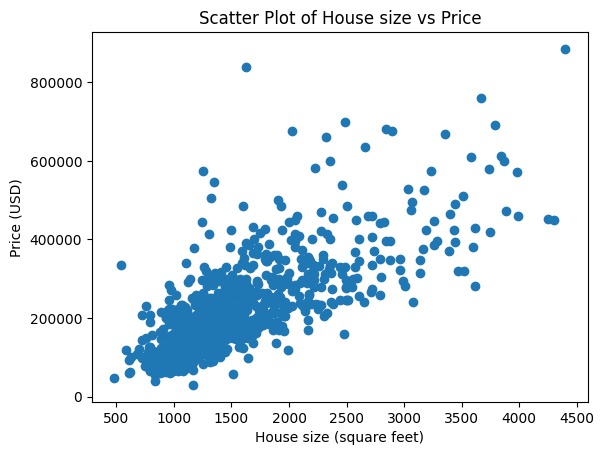

In [6]:
# Plot
plt.scatter(sacramento["sq__ft"], sacramento['price'])

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')
plt.show()

In [28]:
np.random.seed(10)
small_sacramento = sacramento.sample(n = 30)
small_sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
486,7540 HICKORY AVE,ORANGEVALE,95662,CA,3,1,1456,Residential,Thu May 15 00:00:00 EDT 2008,225000,38.703056,-121.235221
399,9013 CASALS ST,SACRAMENTO,95826,CA,2,1,795,Condo,Mon May 19 00:00:00 EDT 2008,126960,38.557045,-121.371670
233,12901 FURLONG DR,WILTON,95693,CA,5,3,3788,Residential,Mon May 19 00:00:00 EDT 2008,691659,38.413535,-121.188211
408,9474 VILLAGE TREE DR,ELK GROVE,95758,CA,4,2,1776,Residential,Mon May 19 00:00:00 EDT 2008,210000,38.413947,-121.408276
549,2901 PINTAIL WAY,ELK GROVE,95757,CA,4,3,3070,Residential,Tue May 20 00:00:00 EDT 2008,495000,38.398488,-121.473424
43,191 BARNHART CIR,SACRAMENTO,95835,CA,4,2,2605,Residential,Fri May 16 00:00:00 EDT 2008,257200,38.675594,-121.515878
181,8316 NORTHAM DR,ANTELOPE,95843,CA,3,2,1235,Residential,Fri May 16 00:00:00 EDT 2008,246544,38.720767,-121.376678
250,2130 CATHERWOOD WAY,SACRAMENTO,95835,CA,3,2,1424,Residential,Mon May 19 00:00:00 EDT 2008,251000,38.675506,-121.510987
140,620 KESWICK CT,GRANITE BAY,95746,CA,4,3,2356,Residential,Fri May 16 00:00:00 EDT 2008,600000,38.732096,-121.219142
392,8593 DERLIN WAY,SACRAMENTO,95823,CA,3,2,1436,Residential,Mon May 19 00:00:00 EDT 2008,180000,38.447585,-121.426627


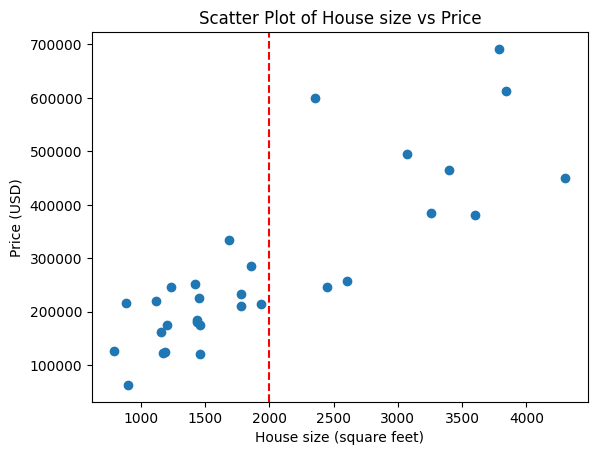

In [8]:
# Plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'])

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House size vs Price')

plt.show()

In [30]:
#calculate absolute diff between 2000 and each home in the data
small_sacramento["dist"] = (2000 - small_sacramento["sq__ft"]).abs()

In [31]:
# k = 10
nearest_neighbors = small_sacramento.nsmallest(10, "dist")

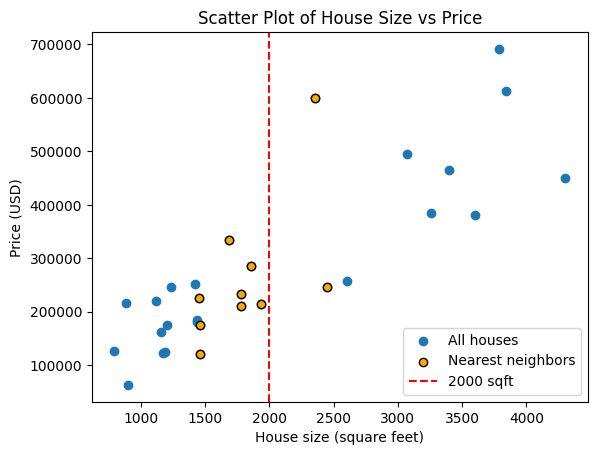

In [32]:
# Scatter plot
plt.scatter(small_sacramento["sq__ft"], small_sacramento['price'], label='All houses')

# Plot nearest neighbors in orange
plt.scatter(nearest_neighbors["sq__ft"], nearest_neighbors['price'], color='orange', label='Nearest neighbors', edgecolor='black')

# Add a vertical line at 2,000 square feet
plt.axvline(x=2000, color='red', linestyle='--', label='2000 sqft')

# Add labels, title, and legend
plt.xlabel("House size (square feet)")
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of House Size vs Price')
plt.legend()

In [15]:
prediction = nearest_neighbors["price"].mean()
prediction

np.float64(255630.0)

In [33]:
sacramento_train, sacramento_test = train_test_split(sacramento, train_size = 0.75, random_state = 42)

In [ ]:
#step 1. define our X and y

X_train = sacramento_train[["sq__ft"]] #predictor
y_train = sacramento_train["price"] #response

In [52]:
#step 2. initialize our knn-regression model
knn_regressor = KNeighborsRegressor()

In [53]:
#step 3. define our parameter grid
param_grid = {
    "n_neighbors" : range(1,201,3)
}

In [54]:
#step 4. initialize grid search 
sacr_gridsearch = GridSearchCV(
    estimator = knn_regressor,
    param_grid = param_grid,
    cv = 5, #number of folds
    scoring = "neg_root_mean_squared_error" #could also do "r2"
)

In [55]:
#step 5. fit grid search to our data
sacr_gridsearch.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(1, 201, 3)}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,19


In [56]:
results = pd.DataFrame(sacr_gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001130,0.000708,0.001625,0.000735,1,{'n_neighbors': 1},-109530.075598,-122670.505520,-111360.498507,-120877.325326,-113767.296248,-115641.140240,5215.551869,67
1,0.000698,0.000195,0.000626,0.000158,4,{'n_neighbors': 4},-85975.424765,-96979.012368,-99861.917778,-90784.978321,-96853.655847,-94090.997816,5021.328818,52
2,0.000713,0.000366,0.000754,0.000204,7,{'n_neighbors': 7},-82098.079295,-94545.162492,-97178.607656,-88573.838547,-89966.690371,-90472.475673,5206.729117,32
3,0.000488,0.000019,0.000529,0.000028,10,{'n_neighbors': 10},-79832.964436,-94531.852356,-95492.266165,-84472.272037,-88184.085946,-88502.688188,5944.996090,19
4,0.000498,0.000024,0.000612,0.000125,13,{'n_neighbors': 13},-77529.550911,-92777.314259,-96244.173100,-84907.316315,-85135.839890,-87318.838895,6570.656421,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000467,0.000023,0.001578,0.000090,187,{'n_neighbors': 187},-89378.723531,-103873.760490,-110872.348125,-98273.320067,-78550.800533,-96189.790549,11282.611303,62
63,0.000541,0.000062,0.001808,0.000212,190,{'n_neighbors': 190},-89822.292567,-104224.631358,-111150.665004,-98688.000478,-78656.136710,-96508.345223,11332.203195,63
64,0.000489,0.000094,0.001756,0.000236,193,{'n_neighbors': 193},-90262.029970,-104472.115554,-111388.539665,-99027.674587,-78669.368616,-96763.945678,11385.145828,64
65,0.000448,0.000046,0.001668,0.000212,196,{'n_neighbors': 196},-90617.106582,-104567.867484,-111678.265612,-99531.765527,-78744.883353,-97027.977712,11429.091256,65


In [57]:
#take the non-negative RMSPE
results["mean_test_score"] = results["mean_test_score"].abs()
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001130,0.000708,0.001625,0.000735,1,{'n_neighbors': 1},-109530.075598,-122670.505520,-111360.498507,-120877.325326,-113767.296248,115641.140240,5215.551869,67
1,0.000698,0.000195,0.000626,0.000158,4,{'n_neighbors': 4},-85975.424765,-96979.012368,-99861.917778,-90784.978321,-96853.655847,94090.997816,5021.328818,52
2,0.000713,0.000366,0.000754,0.000204,7,{'n_neighbors': 7},-82098.079295,-94545.162492,-97178.607656,-88573.838547,-89966.690371,90472.475673,5206.729117,32
3,0.000488,0.000019,0.000529,0.000028,10,{'n_neighbors': 10},-79832.964436,-94531.852356,-95492.266165,-84472.272037,-88184.085946,88502.688188,5944.996090,19
4,0.000498,0.000024,0.000612,0.000125,13,{'n_neighbors': 13},-77529.550911,-92777.314259,-96244.173100,-84907.316315,-85135.839890,87318.838895,6570.656421,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000467,0.000023,0.001578,0.000090,187,{'n_neighbors': 187},-89378.723531,-103873.760490,-110872.348125,-98273.320067,-78550.800533,96189.790549,11282.611303,62
63,0.000541,0.000062,0.001808,0.000212,190,{'n_neighbors': 190},-89822.292567,-104224.631358,-111150.665004,-98688.000478,-78656.136710,96508.345223,11332.203195,63
64,0.000489,0.000094,0.001756,0.000236,193,{'n_neighbors': 193},-90262.029970,-104472.115554,-111388.539665,-99027.674587,-78669.368616,96763.945678,11385.145828,64
65,0.000448,0.000046,0.001668,0.000212,196,{'n_neighbors': 196},-90617.106582,-104567.867484,-111678.265612,-99531.765527,-78744.883353,97027.977712,11429.091256,65


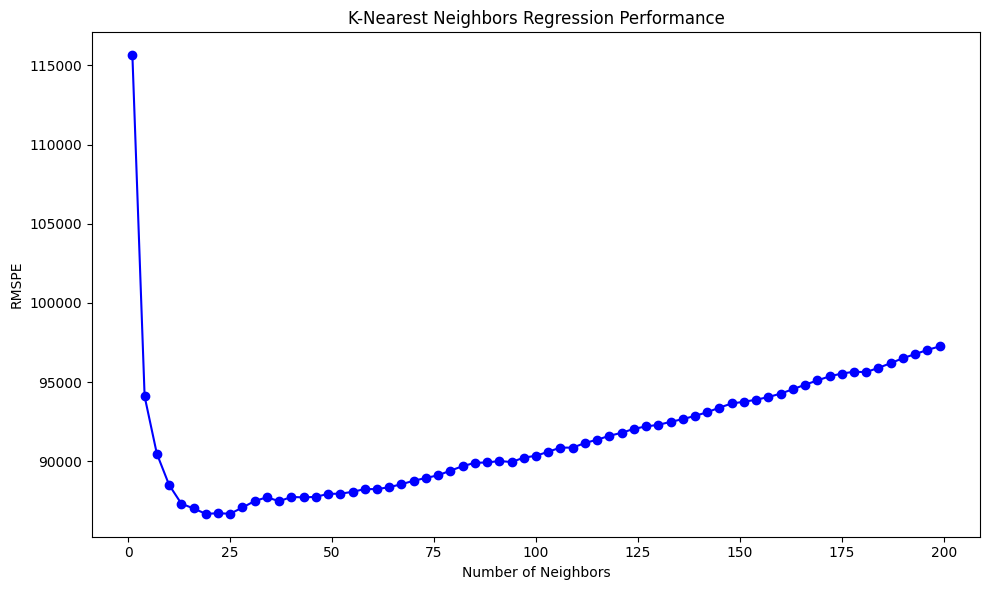

In [58]:
#Create the plot
plt.figure(figsize=(10, 6))

# Plot mean test scores with error bars
plt.plot(results['param_n_neighbors'], results['mean_test_score'], '-o', color='blue')

# Add labels and legend
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSPE')
plt.title('K-Nearest Neighbors Regression Performance')
plt.tight_layout()
plt.show()

In [59]:
sacr_gridsearch.best_params_

{'n_neighbors': 19}

In [60]:
#make preditions on the test set
sacramento_test["predicted"] = sacr_gridsearch.predict(sacramento_test[["sq__ft","beds"]])


In [61]:
#calculate the RMSPE for our test data

(mean_squared_error(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
))**(1/2)

74274.4752948659

In [62]:
#calculate r2
r2_score(
    y_true = sacramento_test["price"],
    y_pred = sacramento_test["predicted"]
)

0.4948020729590097

/Users/juliagallucci/Desktop/CI:TA Positions/DSI Linear regression, classification, and resampling CI/LCR/lcr-env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


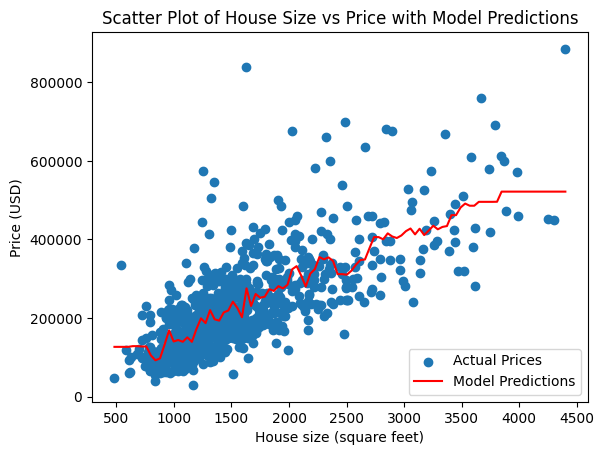

In [50]:
# Generate a range of house sizes for prediction
sizes = np.linspace(sacramento["sq__ft"].min(), sacramento["sq__ft"].max(), 100).reshape(-1, 1)

# Predict house prices for these sizes using the best model from GridSearchCV
predicted_prices = sacr_gridsearch.predict(sizes)

# Plot the original data
plt.scatter(sacramento["sq__ft"], sacramento["price"], label="Actual Prices")

# Plot the model predictions as a line
plt.plot(sizes, predicted_prices, color='red', label="Model Predictions")

# Add labels and legend
plt.xlabel("House size (square feet)")
plt.ylabel("Price (USD)")
plt.title("Scatter Plot of House Size vs Price with Model Predictions")
plt.legend()
plt.show()